# Beginners Guide to the Three Types of Machine Learning

https://towardsdatascience.com/beginners-guide-to-the-three-types-of-machine-learning-3141730ef45d

## Classification

Scikit-learn has a number of datasets that can be directly accessed via the library. For ease in this article, I will be using these example datasets throughout. To illustrate classification I will use the wine dataset which is a multiclass classification problem. In the dataset, the inputs (X) consist of 13 features relating to various properties of each wine type. The known outputs (y) are wine types which in the dataset have been given a number 0, 1 or 2.

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV
from sklearn.svm import SVR

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['TARGET'] = pd.Series(wine.target)
X_w = wine_df.drop(['TARGET'], axis=1)
y_w = wine_df['TARGET']
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2)

In [3]:
# PCH: The following CODE is sweet using for loop.
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='rbf', C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]
for classifier in classifiers:
    model = classifier
    model.fit(X_train_w, y_train_w)
    y_pred_w = model.predict(X_test_w)
    print(classifier)
    print("model score:%.3f" % f1_score(y_test_w, y_pred_w, average='weighted'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score:0.698
SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model score:0.192
NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, probability=True, random_state=None,
      shrinking=True, tol=0.001, verbose=False)
model score:0.192
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_sampl

/Users/macnbeyond/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macnbeyond/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/macnbeyond/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macnbeyond/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricW

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
model score:0.944


A perfect F1 score would be 1.0, therefore, the closer the number is to 1.0 the better the model performance. The results above suggest that DecisionTreeClassifier and the Random Forest Classifier are the best model for this dataset.

## Regression

In regression, the outputs (y) are continuous values rather than categories. An example of regression would be predicting how many sales a store may make next month, or what the future price of your house might be.

Again to illustrate regression I will use a dataset from scikit-learn known as the boston housing dataset. This consists of 13 features (X) which are various properties of a house such as the number of rooms, the age and crime rate for the location. The output (y) is the price of the house.

I am loading the data using the code below and splitting it into test and train sets using the same method I used for the wine dataset.

In [4]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = pd.Series(boston.target)

X_b = boston_df.drop(['TARGET'], axis=1)
y_b = boston_df['TARGET']
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2)

https://scikit-learn.org/stable/_static/ml_map.png   Choosing the right estimator cheat sheet

In [5]:
regressors = [
    linear_model.Lasso(alpha=0.1),
    linear_model.LinearRegression(),
    ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True, 
                 l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None, normalize=False, positive=False, 
                precompute='auto', random_state=0, selection='cyclic', tol=0.0001, verbose=0),
    SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto_deprecated', kernel='rbf', 
       max_iter=-1, shrinking=True, tol=0.001, verbose=False),
    linear_model.Ridge(alpha=.5)
]

for regressor in regressors:
    model = regressor
    model.fit(X_train_b, y_train_b)
    y_pred_b = model.predict(X_test_b)
    print(regressor)
    print("mean squared error: %.3f" % sqrt(mean_squared_error(y_test_b, y_pred_b)))

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
mean squared error: 5.084
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
mean squared error: 5.001
ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)
mean squared error: 5.396
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
mean squared error: 9.279
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
mean squared error: 4.999


/Users/macnbeyond/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The RMSE score suggests that Lasso performs best for this dataset.

## Unsupervised learning

There are a number of different types of unsupervised learning but for simplicity here I am going to focus on the clustering methods. There are many different algorithms for clustering all of which use slightly different techniques to find clusters of inputs.

Probably one of the most widely used methods is Kmeans. This algorithm performs an iterative process whereby a specified number of randomly generated means are initiated. A distance metric, Euclidean distance is calculated for each data point from the centroids, thus creating clusters of similar values. The centroid of each cluster then becomes the new mean and this process is repeated until the optimum result has been achieved.

Let’s use the wine dataset we used in the classification task, with the y labels removed, and see how well the k-means algorithm can identify the wine types from the inputs.

As we are only using the inputs for this model I am splitting the data into test and train using a slightly different method.

In [6]:
np.random.seed(0)
msk = np.random.rand(len(X_w)) < 0.8
train_w = X_w[msk]
test_w = X_w[~msk]
#train_w
#test_w

As Kmeans is reliant on the distance metric to determine the clusters it is usually necessary to perform feature scaling (ensuring that all features have the same scale) before training the model. In the below code I am using the MinMaxScaler to scale the features so that all values fall between 0 and 1.

In [7]:
x = train_w.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled, columns=train_w.columns)
#X_scaled

With K-means you have to specify the number of clusters the algorithm should use. So one of the first steps is to identify the optimum number of clusters. This is achieved by iterating through a number of values of k and plotting the results on a chart. This is known as the Elbow method as it typically produces a plot with a curve that looks a little like the curve of your elbow. The yellowbrick library (which is a great library for visualising scikit-learn models and can be pip installed) has a really nice plot for this. The code below produces this visualisation.

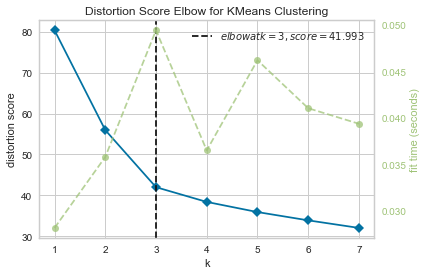

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(X_scaled)
visualizer.show()

#### Ordinarily, we wouldn’t already know how many categories we have in a dataset where we are using a clustering technique. However, in this case, we know that there are three wine types in the data — the curve has correctly selected three as the optimum number of clusters to use in the model.

The next step is to initialise the K-means algorithm and fit the model to the training data and evaluate how effectively the algorithm has clustered the data.

One method used for this is known as the silhouette score. This measures the consistency of values within the clusters. Or in other words how similar to each other the values in each cluster are, and how much separation there is between the clusters. The silhouette score is calculated for each value and will range from -1 to +1. These values are then plotted to form a silhouette plot. Again yellowbrick provides a simple way to construct this type of plot. The code below creates this visualisation for the wine dataset.

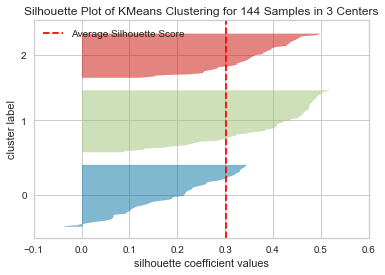

In [9]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_scaled)
visualizer.show()

A silhouette plot can be interpreted in the following way:

- The closer the mean score (which is the red dotted line in the above) is to +1 the better matched the data points are within the cluster.
- Data points with a score of 0 are very close to the decision boundary for another cluster (so the separation is low).
- Negative values indicate that the data points may have been assigned to the wrong cluster.
- The width of each cluster should be reasonably uniform if they aren’t then the incorrect value of k may have been used.

The plot for the wine data set above shows that cluster 0 may not be as consistent as the others due to most data points being below the average score and a few data points having a score below 0.

Silhouette scores can be particularly useful in comparing one algorithm against another or different values of k.